<a href="https://colab.research.google.com/github/phcavalcanti/projeto_imobiliaria_rj/blob/main/4_Identificando_e_Removendo_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório de Análise V

Remoçao de Outliers

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure',figsize = (14,6))

In [3]:
url ='https://raw.githubusercontent.com/phcavalcanti/projeto_imobiliaria_rj/main/Residenciais_com_zona.csv'

In [4]:
dados = pd.read_csv(url, sep = ';')

In [5]:
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Total,Valor Total p m2,Zona,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,56.50,Sul,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,Sul,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,80.67,Centro,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,21.46,Norte,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,32.36,Norte,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21821,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,1438.0,20.54,Norte,Apartamento
21822,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1175.0,43.52,Centro,Apartamento
21823,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2640.0,33.85,Oeste,Apartamento
21824,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1946.0,40.54,Norte,Apartamento


In [6]:
#utilizarei box plot para retirar os valores outliers

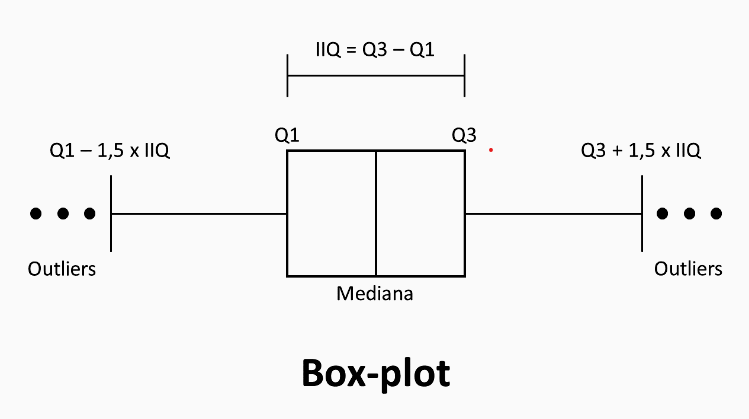

<Axes: >

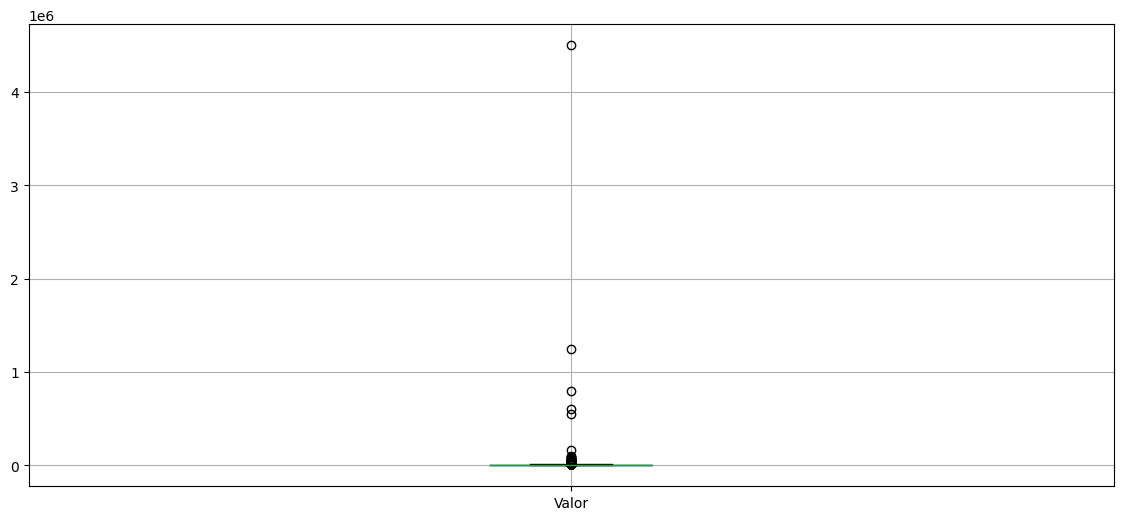

In [7]:
dados.boxplot(['Valor'])

In [8]:
# os outliers estao distorcendo o gráfico, impossibilitando sua correta visualização.

In [9]:
#observando valores discrepantes
dados[dados['Valor'] >= 500000]
#provavelmente foram preenchidos o valor de venda inves do valor do aluguel

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Total,Valor Total p m2,Zona,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,601100.0,9247.69,Oeste,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,800900.0,4913.50,Norte,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,551000.0,3673.33,Norte,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,1251506.0,7494.05,Oeste,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,4501100.0,15003.67,Sul,Apartamento


## Calculando parâmetros do box plot

In [10]:
valor = dados['Valor']

In [26]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [15]:
selecao = (valor >= limite_inferior ) & (valor <= limite_superior)

In [16]:
dados_selecao = dados[selecao]

In [17]:
dados_selecao

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Total,Valor Total p m2,Zona,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,56.50,Sul,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,Sul,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,80.67,Centro,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,21.46,Norte,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,32.36,Norte,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21821,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,1438.0,20.54,Norte,Apartamento
21822,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1175.0,43.52,Centro,Apartamento
21823,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2640.0,33.85,Oeste,Apartamento
21824,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1946.0,40.54,Norte,Apartamento


<Axes: >

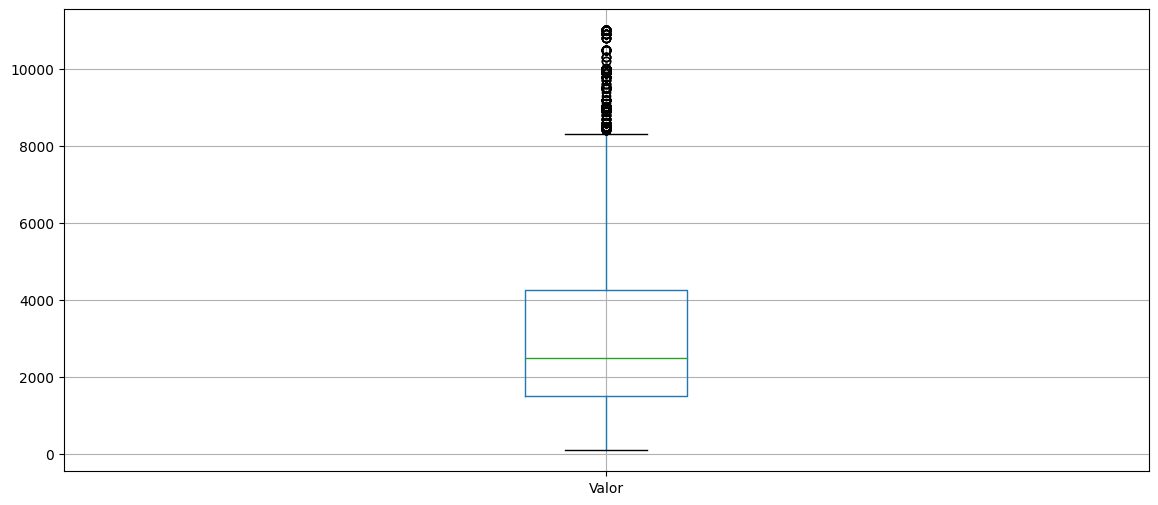

In [18]:
dados_selecao.boxplot('Valor')#printando boxplot para os valores selecionados

In [19]:
#histograma dos valores

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

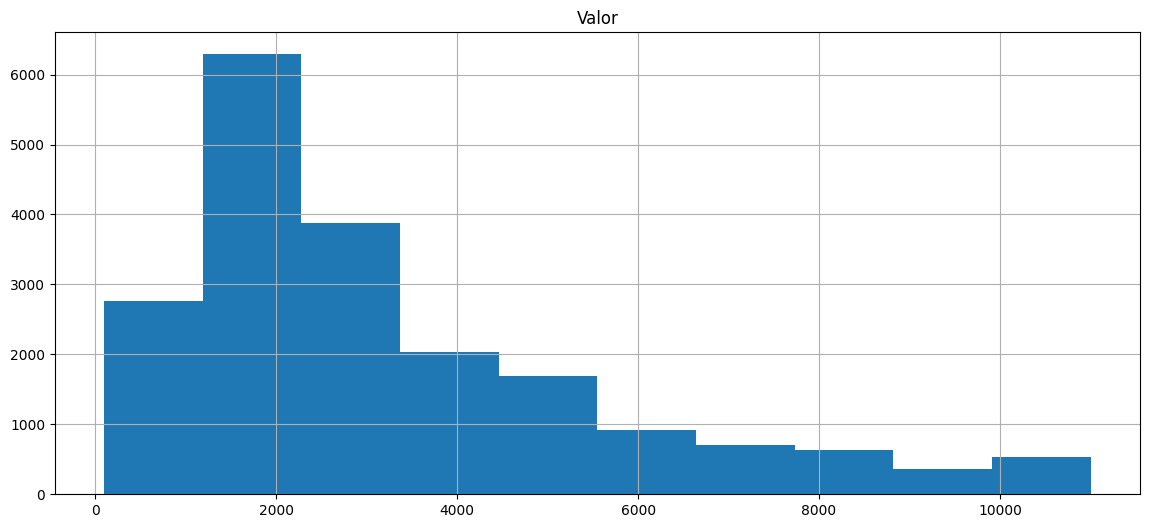

In [20]:
dados_selecao.hist(['Valor'])

<Axes: title={'center': 'Valor'}, xlabel='Tipo'>

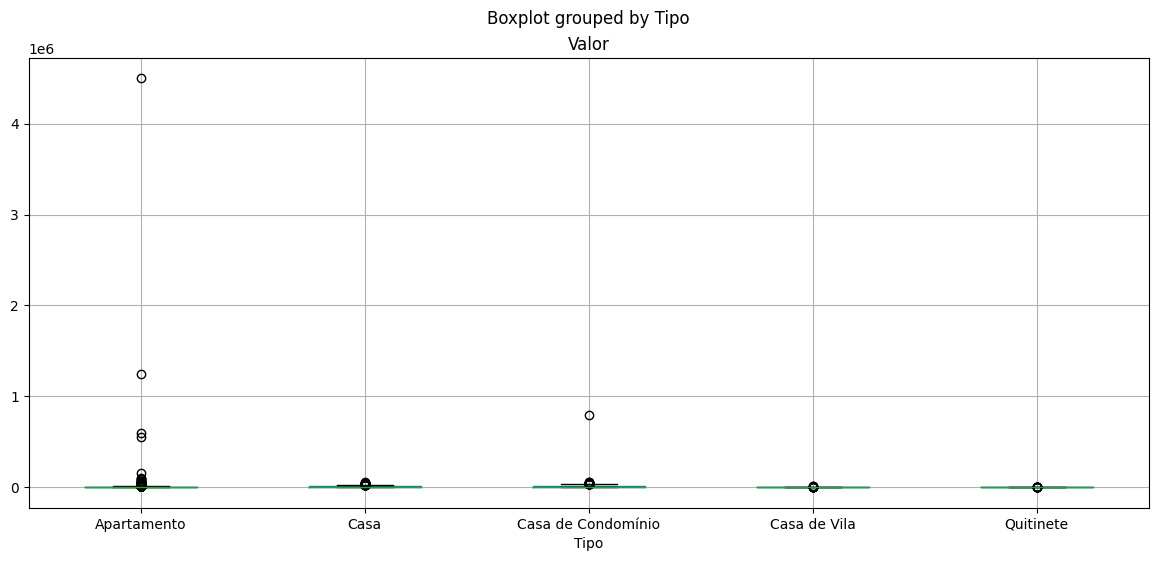

In [21]:
# verificando box plot por tipo de imovel , para evitar remocao de valores que possam ser mal interpretados como outliers
dados.boxplot(['Valor'], by = 'Tipo')

In [24]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [25]:
grupo_tipo.groups

{'Apartamento': [2, 3, 4, 7, 8, 9, 11, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 79, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, ...], 'Casa': [1, 22, 54, 57, 96, 100, 144, 160, 180, 238, 250, 253, 264, 286, 310, 316, 334, 339, 357, 378, 385, 399, 424, 434, 474, 475, 481, 511, 542, 543, 567, 571, 572, 618, 621, 630, 635, 636, 660, 676, 700, 721, 724, 760, 771, 780, 856, 873, 937, 982, 1029, 1036, 1118, 1123, 1125, 1157, 1178, 1249, 1256, 1316, 1335, 1350, 1371, 1412, 1426, 1430, 1440, 1445, 1472, 1475, 1488, 1586, 1604, 1656, 1662, 1666, 1671, 1684, 1709, 1717, 1762, 1810, 1835, 1875, 1905, 1933, 1942, 1960, 2019, 2039, 2056, 2075, 2101, 2107, 2108, 2133, 2170, 2201, 2204, 2211, ...], 'Casa 

In [27]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [28]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [29]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [30]:
IIQ

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [31]:
limite_inferior

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [32]:
limite_superior

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [34]:
dados_new = pd.DataFrame()#novo dataframe somente com os valores sem outliers para cada tipo de imovel
for tipo in grupo_tipo.groups.keys():#iteracao para cada tipo de imovel, vai remover os outliers de cada tipo e jogar no novo dataframe.
  eh_tipo = dados['Tipo'] == tipo
  eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
  selecao = eh_tipo & eh_dentro_limite
  dados_selecao = dados[selecao]
  dados_new = pd.concat([dados_new, dados_selecao ])

<Axes: title={'center': 'Valor'}, xlabel='Tipo'>

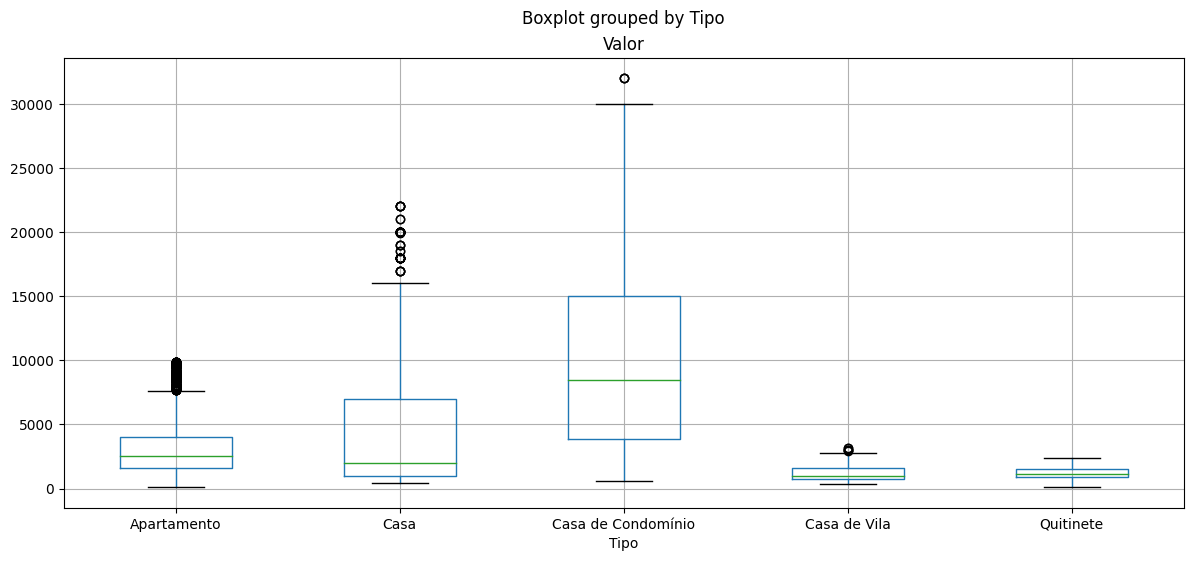

In [35]:
dados_new.boxplot(['Valor'], by = 'Tipo')

In [36]:
dados_new.to_csv('aluguel_residencial_sem_outliers.csv', sep = ';', index = False)